In [1]:
# 45 degree angle and 135 degree angle
# this means that ther is a slope going upwards where x = y
# when x = y, there is 45 degree angles on either side which means 135 for 
# other rhombus angle
# so slope is x = y which means x = 1 and y = 1

In [2]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [3]:
npts = 10000

X1 = np.zeros((npts,2))
y1 = np.zeros(npts)

for i in range(0,npts): 
    X1[i,0] = np.random.uniform(0.0,2.0) 
    X1[i,1] = np.random.uniform(0.0,2.0)
    
    if (X1[i,1]>=0.25) and X1[i,0]/X1[i,1]>=1 and (X1[i,1]<=1) and (2-X1[i,0])/(1-X1[i,1]) >= 1:
        y1[i] = 1
    else:
        y1[i] = 0

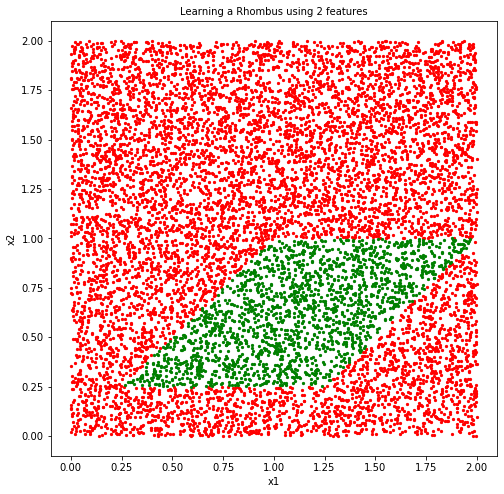

In [4]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Rhombus using 2 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X1[y1==0, 0], y = X1[y1==0, 1], color='red', label='0', s=5)
plt.scatter(x = X1[y1==1, 0], y = X1[y1==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(
         X1, y1, test_size=0.50, random_state=0)

In [6]:
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X1_train, y1_train)

    X1_combined = np.vstack((X1_train, X1_test))
    y1_combined = np.hstack((y1_train, y1_test))

    # optional outputs
    z = tree.apply(X1_combined)
    #print(z)
    dp = tree.decision_path(X1_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X1_train,y1_train)
    Errors[i,1] = 1 - tree.score(X1_test,y1_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.18259999999999998 0.19599999999999995
2 0.18259999999999998 0.19599999999999995
3 0.118 0.11219999999999997
4 0.08099999999999996 0.08299999999999996
5 0.07040000000000002 0.07799999999999996
6 0.045599999999999974 0.0514
7 0.022199999999999998 0.028000000000000025
8 0.010199999999999987 0.020199999999999996
9 0.0048000000000000265 0.012199999999999989
10 0.0013999999999999568 0.008000000000000007


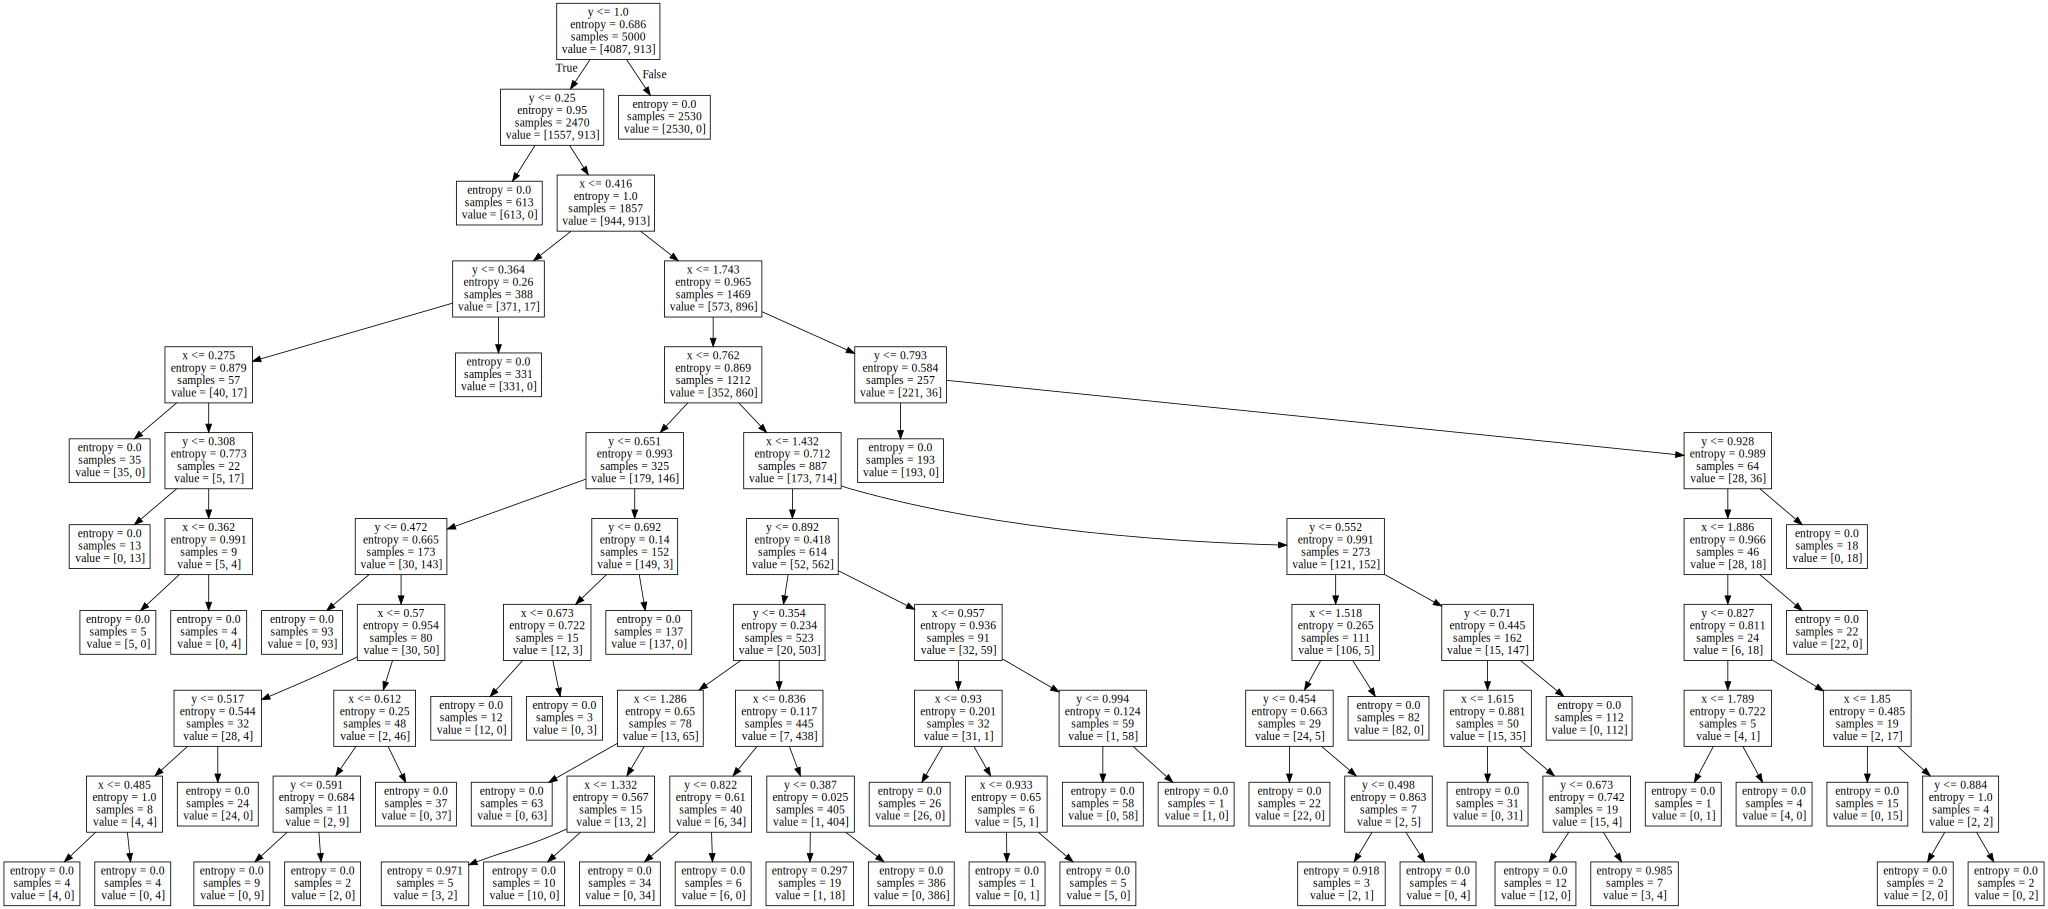

In [7]:
export_graphviz(tree, out_file='TQ1.dot', feature_names=['x','y'])
with open('TQ1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

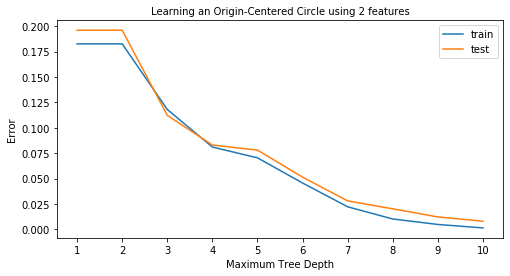

In [8]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# 4 features

In [9]:
npts = 10000

X2 = np.zeros((npts,5))
y2 = np.zeros(npts)

for i in range(0,npts): 
    X2[i,0] = np.random.uniform(0.0,2.0) 
    X2[i,1] = np.random.uniform(0.0,2.0)
    X2[i,2] = X2[i,0]+X2[i,1]
    X2[i,3] = X2[i,0]-X2[i,1]
    
    if (X2[i,1]>=0.25) and X2[i,0]/X2[i,1]>=1 and (X2[i,1]<=1) and (2-X2[i,0])/(1-X2[i,1]) >= 1:
        y2[i] = 1
    else:
        y2[i] = 0


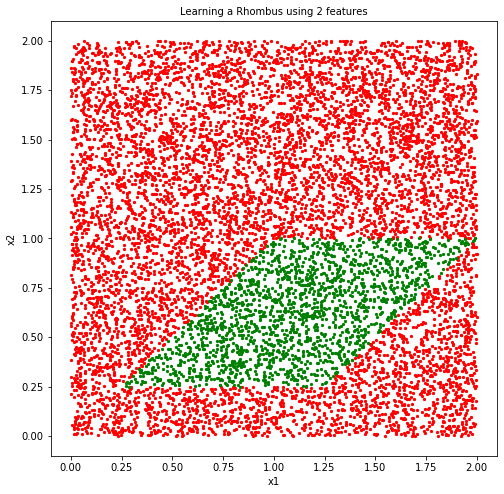

In [10]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Rhombus using 2 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X2[y2==0, 0], y = X2[y2==0, 1], color='red', label='0', s=5)
plt.scatter(x = X2[y2==1, 0], y = X2[y2==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [11]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
         X2, y2, test_size=0.50, random_state=0)

In [12]:
MaxDepth = 10
DotFileName ='T5.dot'
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X2_train, y2_train)

    X2_combined = np.vstack((X2_train, X2_test))
    y2_combined = np.hstack((y2_train, y2_test))

    # optional outputs
    z = tree.apply(X2_combined)
    #print(z)
    dp = tree.decision_path(X2_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X2_train,y2_train)
    Errors[i,1] = 1 - tree.score(X2_test,y2_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.1904 0.1906
2 0.1844 0.19279999999999997
3 0.07179999999999997 0.07299999999999995
4 0.0 0.00039999999999995595
5 0.0 0.00039999999999995595
6 0.0 0.00039999999999995595
7 0.0 0.00039999999999995595
8 0.0 0.00039999999999995595
9 0.0 0.00039999999999995595
10 0.0 0.00039999999999995595


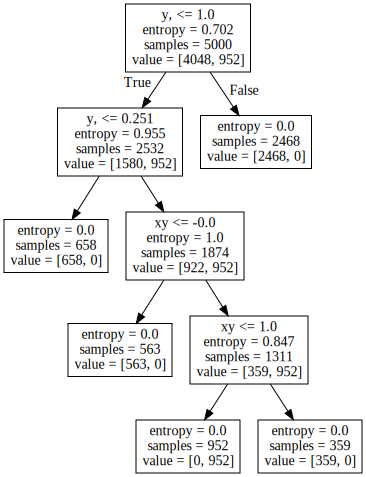

In [13]:
export_graphviz(tree, out_file='t5a.dot', feature_names=['x','y,','x**2','xy','y**2'])
with open('T5a.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

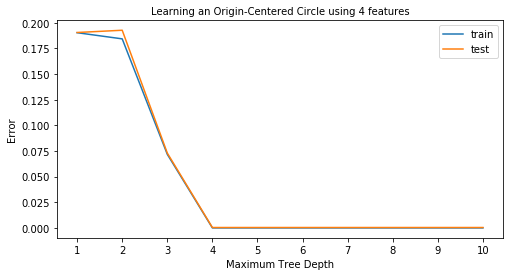

In [14]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 4 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# 6 feature

In [15]:
npts = 10000

X3 = np.zeros((npts,6))
y3 = np.zeros(npts)

for i in range(0,npts): 
    X3[i,0] = np.random.uniform(0.0,2.0) 
    X3[i,1] = np.random.uniform(0.0,2.0)
    X3[i,2] = X3[i,0]+X3[i,1] 
    X3[i,3] = X3[i,0]-X3[i,1]
    X3[i,4] = 2*X3[i,0]+X3[i,1]
    X3[i,5] = X3[i,0]+(2*X3[i,1])
    
    if (X3[i,1]>=0.25) and X3[i,0]/X3[i,1]>=1 and (X3[i,1]<=1) and (2-X3[i,0])/(1-X3[i,1]) >= 1:
        y3[i] = 1
    else:
        y3[i] = 0

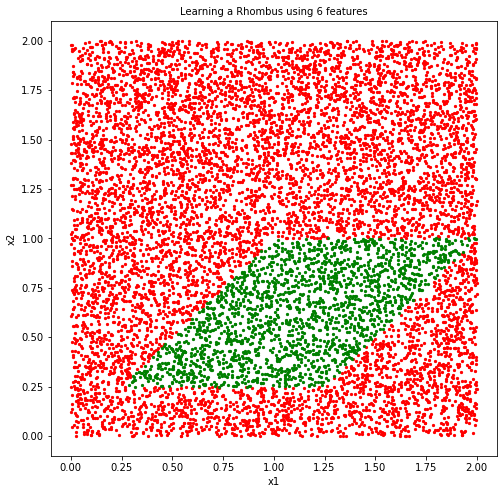

In [16]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Rhombus using 6 features', fontsize='medium')
plt.xlabel('x1')
plt.ylabel('x2')
plt.scatter(x = X3[y3==0, 0], y = X3[y3==0, 1], color='red', label='0', s=5)
plt.scatter(x = X3[y3==1, 0], y = X3[y3==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [17]:
X3_train, X3_test, y3_train, y3_test = train_test_split(
         X3, y3, test_size=0.50, random_state=0)

In [18]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X3_train, y3_train)

    X3_combined = np.vstack((X3_train, X3_test))
    y3_combined = np.hstack((y3_train, y3_test))

    # optional outputs
    z = tree.apply(X3_combined)
    #print(z)
    dp = tree.decision_path(X3_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X3_train,y3_train)
    Errors[i,1] = 1 - tree.score(X3_test,y3_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.19140000000000001 0.19340000000000002
2 0.1876 0.18079999999999996
3 0.06299999999999994 0.06140000000000001
4 0.0 0.00019999999999997797
5 0.0 0.00019999999999997797
6 0.0 0.00019999999999997797
7 0.0 0.00019999999999997797
8 0.0 0.00019999999999997797
9 0.0 0.00019999999999997797
10 0.0 0.00019999999999997797


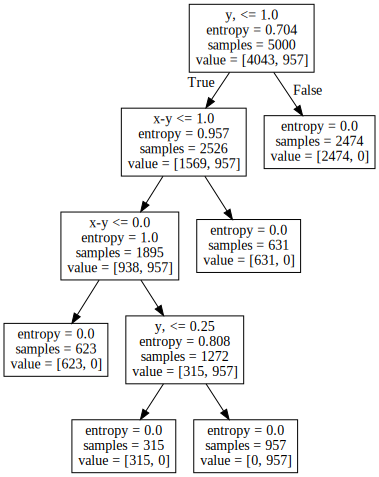

In [19]:
export_graphviz(tree, out_file='T6.dot', feature_names=['x','y,','x+2','x-y','2x+y','x+2y'])
with open('T6.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

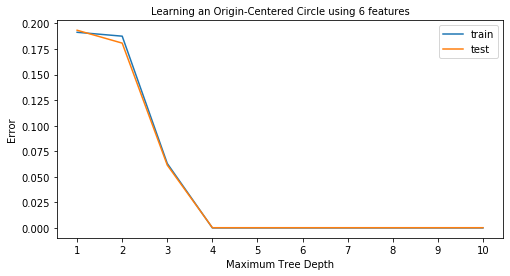

In [20]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 6 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 

# Discussion

For my data, creating a rhombus was thinking about how the slopes act like. Since we need angles of 45 degrees and 135 degrees, this meants that y = x. I came to this conclussion by thinking about how to create a 45 degree line in which i found out that 90 - 45 = 45 which means that y = x in order for that to happen and if you get 45, you also get 135 to create that 180 degree line

Also, 3 different training data were created in this assignment. One with 2 features, one with 4 features and one with 6 features. As shown in 2 features, the line is all over the place and the accuracy is very low and it can also be seen in the tree as the tree keeps on splitting due to the low accuracy. However, starting with the 4 features, the accuracy makes a huge jump and the tree also splits significantly less. The line graph also shows how accurate the data has become and how quick it became accurate. The same can be said about having 6 features as there is almost no difference but it can be said that using 6 features is more accurate than using 4 features.
